# Constraints on the PBH abundance

Compute the forecasted bounds on the PBH abundance for several future experiments

Mass: 1.0e+15, z min: 0.0e+00
Mass: 1.5e+15, z min: 0.0e+00
Mass: 2.0e+15, z min: 0.0e+00
Mass: 2.5e+15, z min: 0.0e+00
Mass: 3.0e+15, z min: 0.0e+00
Mass: 3.5e+15, z min: 0.0e+00
Mass: 4.0e+15, z min: 0.0e+00
Mass: 4.5e+15, z min: 0.0e+00
Mass: 5.0e+15, z min: 0.0e+00
Mass: 5.5e+15, z min: 0.0e+00
Mass: 6.0e+15, z min: 0.0e+00
Mass: 6.5e+15, z min: 0.0e+00
Mass: 7.0e+15, z min: 0.0e+00
Mass: 7.5e+15, z min: 0.0e+00
Mass: 8.0e+15, z min: 0.0e+00
SK
HK
JUNO
DUNE


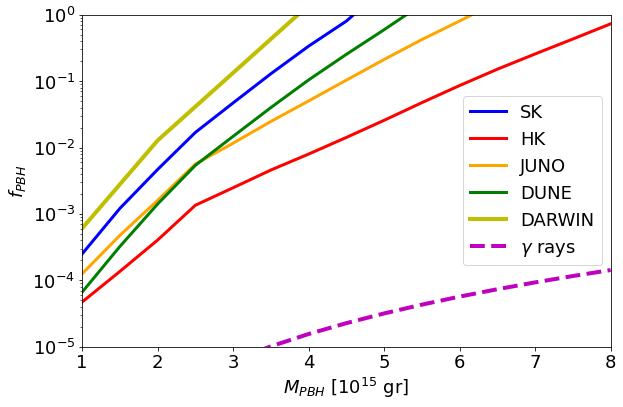

In [1]:
from fluxes_tot import *
from event_rate import *
from chi2_pro import *
import matplotlib as mpl
mpl.rcParams.update({'font.size': 18})

# gamma ray PBH bound, from Carr et al 2020 (write elsewhere, and check if it is at 90 CL)
def boundgamma(M):
    ep = 0.2
    return 2.e-8*(M/5e14)**(3+ep)
    
Mpbhs = np.linspace(1.e15, 8.e15, 15)
fpbhs = np.logspace(-5, 0, 20)

exps = ["SK", "HK", "JUNO", "DUNE"]
cols = ["b", "r", "orange", "g"]

#exps = ["HK", "JUNO", "DUNE"]
#cols = ["r", "orange", "g"]

# Compute fluxes (comment if already computed)
compute_flux(Mpbhs, fpbhs)  # fpbhs not used here actually

fig, ax = plt.subplots(figsize=(9,6))

# Compute the bound for each experiment considered
for ie, exp in enumerate(exps):
    print(exp)
    
    # Compute event rate
    compute_events(Mpbhs, fpbhs, exp)  # fpbhs not used here actually
    
    chitab, fpbh_bounds = compute_chi2_2D_mod(Mpbhs, fpbhs, exp)
    """m_PBH,f_PBH,chi2_val = np.transpose(np.array(chitab))
    
    chi2_90CL_Nparam = 2.71
    min_chi2 = np.min(chi2_val)
    max_chi2 = np.max(chi2_val)
    chi2 = chi2_90CL_Nparam + min_chi2
    
    XX, YY, ZZ = grid_val(m_PBH,f_PBH,chi2_val)"""
    
    plt.plot(Mpbhs/1e15, fpbh_bounds, color=cols[ie],linestyle='-',linewidth=3, label=exps[ie])
    
    """
    XX, YY = np.meshgrid(Mpbhs, fpbhs)
    ZZ = chi2_val.reshape( len(Mpbhs), len(fpbhs) )
    bounds_int = interpolate.Rbf(XX, YY, np.transpose(ZZ),kind="linear")
    #bounds_int = interpolate.interp2d(np.array(Mpbhs), np.array(fpbhs), np.transpose(ZZ),kind="linear")
    
    Mpbhsvec = np.linspace(Mpbhs[0], Mpbhs[-1])
    fpbhsvec = np.logspace(fpbhs[0], fpbhs[-1])
    
    CP =plt.contour(Mpbhsvec/1.e15,fpbhsvec,bounds_int(Mpbhsvec,fpbhsvec), levels=[chi2], colors=cols[ie],linestyles='-')
    """

    #CP = plt.contour(XX/1e15,YY,ZZ, levels=[chi2], colors=cols[ie],linestyles='-',linewidths=3)
    #CPF=plt.contourf(XX,YY,ZZ, levels=[chi2,max_chi2],colors=cols[ie],alpha=0.3)

    """labels = [exp]

    for i in range(len(labels)):
        CP.collections[i].set_label(labels[i])"""
    
mm, ff = np.loadtxt("f_mass2.csv",delimiter=",",unpack=True)
plt.plot(mm/1e15, ff, color="y", linestyle="-", lw=4, label=r"DARWIN")
    
plt.plot(Mpbhs/1e15, boundgamma(Mpbhs), color="m", linestyle="--", lw=4, label=r"$\gamma$ rays")
    
plt.yscale("log")
#plt.xscale("log")

plt.ylabel(r'$  f_{PBH} $')
plt.xlabel(r'$ M_{PBH} $'+' [$10^{15}$ gr]')

plt.legend()#loc='lower right',frameon=False)

plt.xlim(Mpbhs[0]/1e15, Mpbhs[-1]/1e15)
plt.ylim(fpbhs[0], fpbhs[-1])

plt.tight_layout()
plt.savefig("figures/PBH_bounds.pdf", format='pdf')
plt.show()


In [2]:
def bound_anal_chi2_Poi(back, sig):
    #sig is with fpbh=1
    chi2_th = 2.71
    snr = sig/back

    return brentq( lambda fpbh: chi2_th/(2.*back) - (fpbh*snr - np.log(1. + fpbh*snr)), 1.e-7, 1.e5  )

def bound_anal_chi2_apr(back, sig):
    #sig is with fpbh=1
    chi2_th = 2.71
    snr = sig/back
    return np.sqrt(chi2_th/back)/snr
    #return brentq( lambda fpbh: chi2_th/back - (fpbh*snr)**2., 1.e-7, 1.e5  )

back = 17.61243552
events = 42977.52540535
print(bound_anal_chi2_Poi(back, events),bound_anal_chi2_apr(back, events))


0.00018242155461365344 0.00016075072777097706
